# Project Ensemble Techniques

# Importing Required Libraries

In [168]:
##importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by
decreased dopamine levels in the brain. It manifests itself through a deterioration
of movement, including the presence of tremors and stiffness. There is commonly
a marked effect on speech, including dysarthria (difficulty articulating sounds),
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally,
cognitive impairments and changes in mood can occur, and risk of dementia is
increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a
neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe.
Monitoring progression of the disease over time requires repeated clinic visits by
the patient. An effective screening process, particularly one that doesn’t require a
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician


# Attribute Information
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
   measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


As part of this project, our objective is to identify potential patients with Parkinson's disease in the early stages.

The 'Status' is the target variables.

# Reading the dataset and displaying the first 10 records of the dataset.

In [169]:
pat_data = pd.read_csv('Data - Parkinsons') ##reading the dataframe
pat_data.head(10) ##showing the first 10 records from the dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# Checking the Shape and Type of the Data

In [170]:
rows=len(pat_data)
columns = len(pat_data.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
pat_data.info() #Displays the type of the columns that exist in the dataset

The dataset contains 195 rows and 24 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16

- There are 24 columns in the dataset. Fortunately, there are no missing values.
- The first column is nominal in nature. Hence, it is not useful in building models.
- Status is the target variable. 1- person is suffering from Parkinson's disease; 0- otherwise
- Other 22 variabes are continuous in nature

By the looks of it, there seems to be high correlation between some of the varibles.

Also, i've got a strong feeling that we might be facing Curse of Dimensionality as the records are less than 200 while features are around 22. This might lead to overfitting.


To overcome this, let me remove the variables that are collinear.


In [171]:
#dropping name
pat_data.drop(['name'],axis=1,inplace=True)

In [172]:
pat_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [173]:
#Converting the data type of target variable
pat_data['status'] = pat_data['status'].astype('int').astype("category")

In [174]:
pat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MDVP:Fo(Hz)       195 non-null    float64 
 1   MDVP:Fhi(Hz)      195 non-null    float64 
 2   MDVP:Flo(Hz)      195 non-null    float64 
 3   MDVP:Jitter(%)    195 non-null    float64 
 4   MDVP:Jitter(Abs)  195 non-null    float64 
 5   MDVP:RAP          195 non-null    float64 
 6   MDVP:PPQ          195 non-null    float64 
 7   Jitter:DDP        195 non-null    float64 
 8   MDVP:Shimmer      195 non-null    float64 
 9   MDVP:Shimmer(dB)  195 non-null    float64 
 10  Shimmer:APQ3      195 non-null    float64 
 11  Shimmer:APQ5      195 non-null    float64 
 12  MDVP:APQ          195 non-null    float64 
 13  Shimmer:DDA       195 non-null    float64 
 14  NHR               195 non-null    float64 
 15  HNR               195 non-null    float64 
 16  status            195 non-

In [175]:
# Five Number Summary for the Numerical variables
summary = pat_data.describe().T
summary['IQR']= summary['75%']- summary['25%']
summary['Outlier_boundary']= summary['75%']+ summary['IQR']*1.5
summary

,count,mean,std,min,25%,50%,75%,max,IQR,Outlier_boundary
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,65.197000,280.564500
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,89.343000,358.220000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,55.727500,223.609750
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,0.003905,0.013222
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,0.000040,0.000120
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,0.002175,0.007097
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,0.002095,0.007098
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,0.006520,0.021285
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,0.021380,0.069955
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,0.201500,0.652250


In [176]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, MDVP:Fo(Hz) to PPE
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count             22 non-null     float64
 1   mean              22 non-null     float64
 2   std               22 non-null     float64
 3   min               22 non-null     float64
 4   25%               22 non-null     float64
 5   50%               22 non-null     float64
 6   75%               22 non-null     float64
 7   max               22 non-null     float64
 8   IQR               22 non-null     float64
 9   Outlier_boundary  22 non-null     float64
dtypes: float64(10)
memory usage: 1.9+ KB


In [177]:
summary['outlier_flag'] = np.where(summary['Outlier_boundary']< summary['max'], 1, 0)

In [178]:
print('The are %d columns with outliers.' %(sum(summary['outlier_flag'])))

The are 18 columns with outliers.


Most of the columns i.e. 18 out of 22 have outliers. This will affect the parametric methods like Logistic Regression and also Naive Bayes Classification.

Now, we have to
- either treat outliers and then use these parametric methods
- or Use Non- parametric methods

Let's go with option two and see how the results shape up.


But before we move ahead with Non- parametric methods, let us 
1. Drop highly collinear variables
2. Normalize the dataset

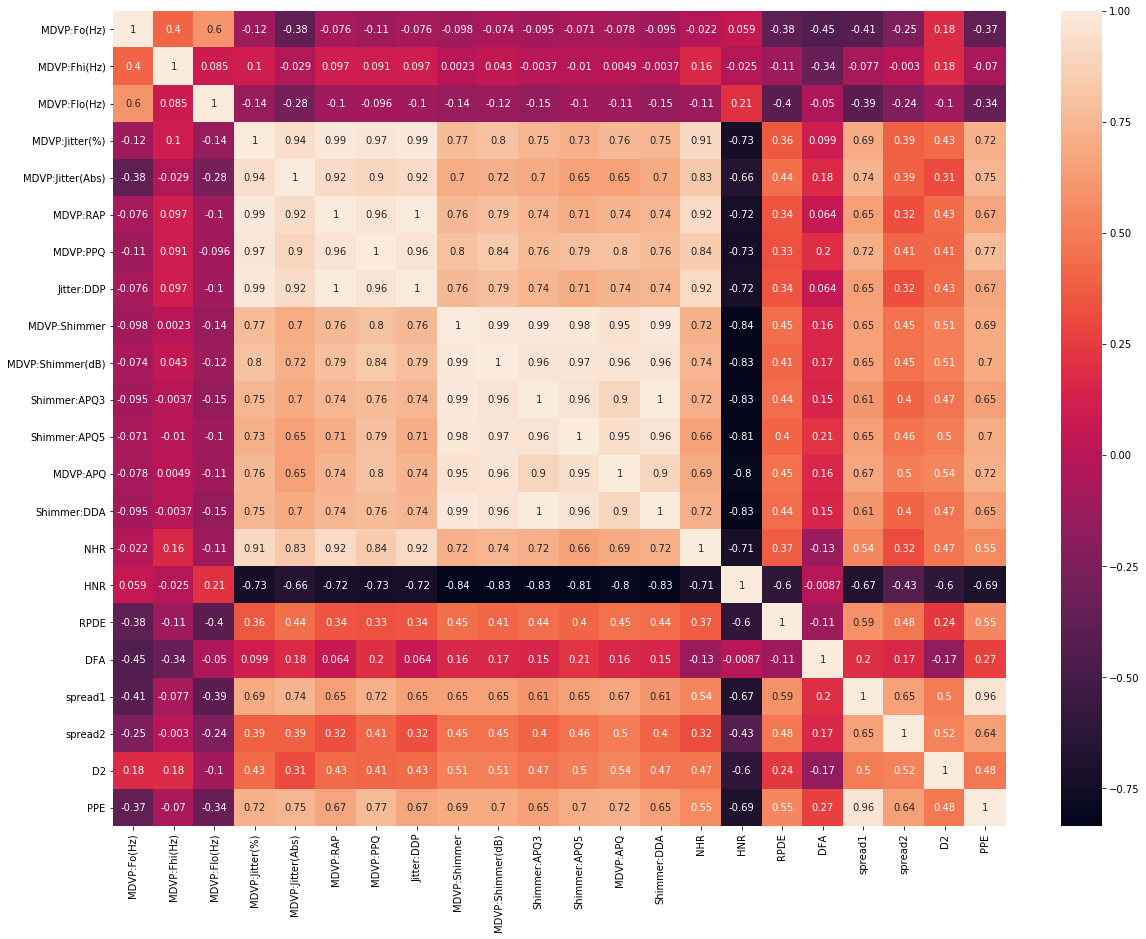

In [179]:
##Visualizing the Correlation amongst the variables
corrMatrix = pat_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)

There seems to be high correlation between some of the variables.
Hence, i've decided to drop some of the variables.
These columns are highly correlated with MDVP:Jitter(%). Hence, they will be dropped
1.   MDVP:Jitter(Abs) 
2.   MDVP:RAP        
3.   MDVP:PPQ        
4.   Jitter:DDP 
5.   NHR
 
 
Similarly, below mentioned columns are correlated with MPVD: Shimmer.
1.  MDVP:Shimmer(dB)   
2.  Shimmer:APQ3       
3.  Shimmer:APQ5     
4.  MDVP:APQ           
5.  Shimmer:DDA       
 
Also, Spread1 and PPE are correlated. Hence, dropping spread1 or PPE won't affect us.

In [180]:
pat_data.drop(columns= ['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','NHR',
                            'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
                            'spread1'],axis=1,inplace=True)

In [181]:
pat_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0,0.448439,0.657899,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0,0.431674,0.683244,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0,0.407567,0.655683,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0,0.451221,0.643956,0.207454,2.138608,0.123306


The columns have been dropped.


# One of the biggest challenges for a non- medical student is to interpret the variables.
# Moreover, there are 11 variables which make visualization very difficult.

# Distribution of some of the variables
- The frequency distribution of MDVP:Fo and MDVP:Fhi are right skewed
- HNR is slighlty skewed towards left

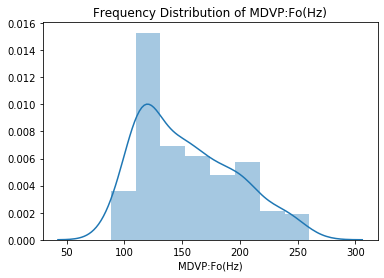

In [182]:
sns.distplot(pat_data['MDVP:Fo(Hz)']).set_title('Frequency Distribution of MDVP:Fo(Hz)');

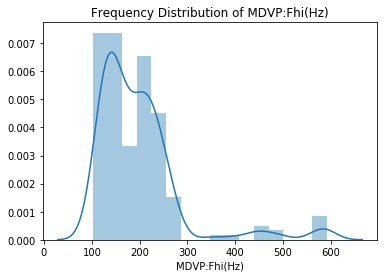

In [183]:
sns.distplot(pat_data['MDVP:Fhi(Hz)']).set_title('Frequency Distribution of MDVP:Fhi(Hz)');

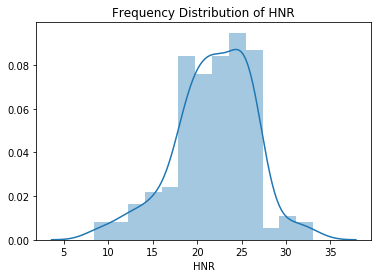

In [184]:
sns.distplot(pat_data['HNR']).set_title('Frequency Distribution of HNR');

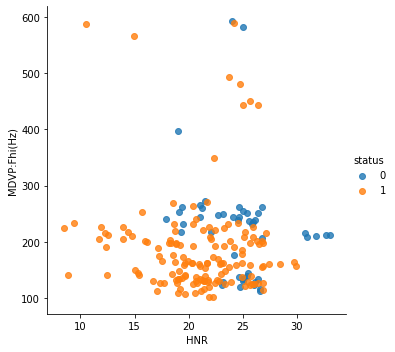

In [185]:
sns.lmplot(x='HNR', y='MDVP:Fhi(Hz)', hue='status', data=pat_data, fit_reg=False)

The scatter plot alludes that there is no clear margin between the 1's and 0's.

# Let us look at the relationship between the variables

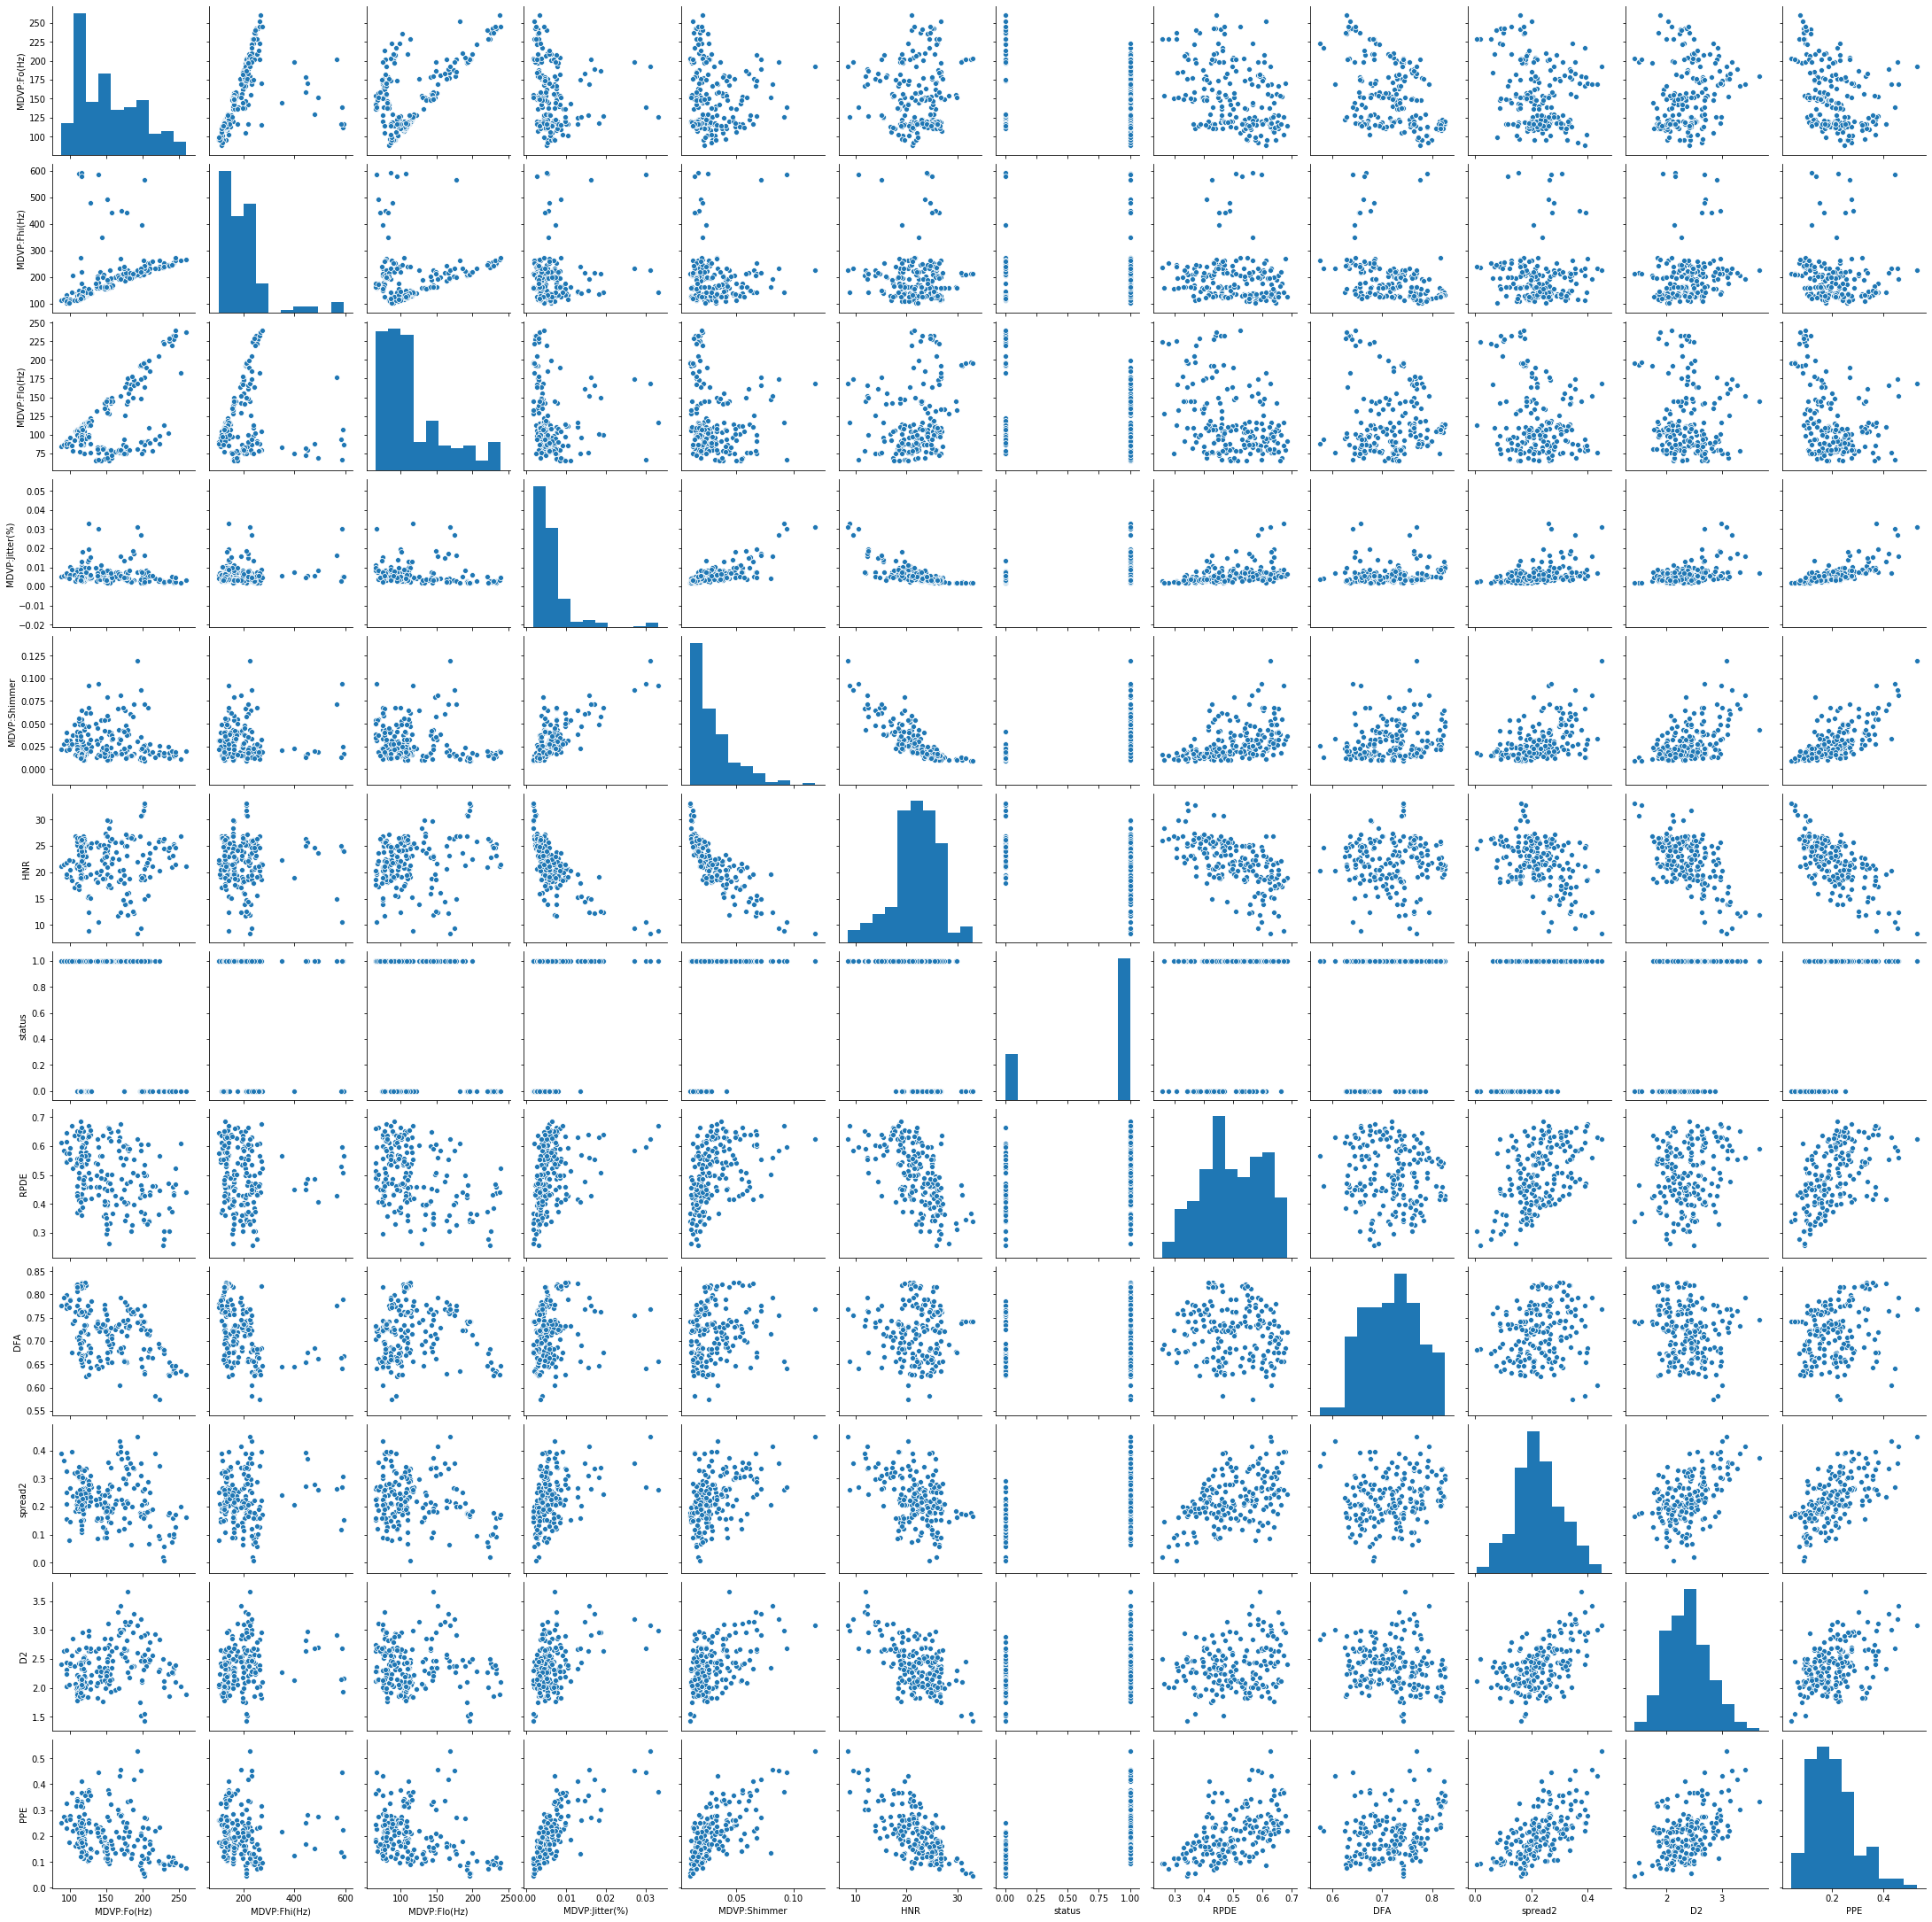

In [186]:
sns.pairplot(pat_data)

# Let us look at the distribution of the Target variable

In [187]:
prop_Y = pat_data['status'].value_counts(normalize=True)
print(prop_Y)

1    0.753846
0    0.246154
Name: status, dtype: float64


The dataset is imbalanced in nature as it has roughly 3/4th records of Parkinson's patients.


Text(0.5, 1.0, 'Frequency Distribution by patients')

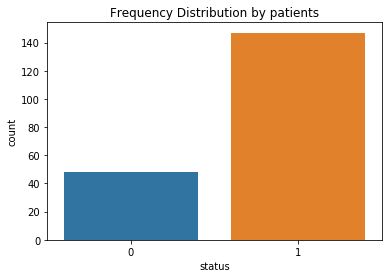

In [188]:
sns.countplot(pat_data['status']).set_title('Frequency Distribution by patients')

- The target variable is imbalanced in nature.
- So, let's first try fitting models without balancing.
- If the results are not good, then we will look to balance datasets and then fit models.

# In the next few steps, we will ready the dataset for model building by these steps
- Normalizing data set to free the model of units of input
- Splitting the dataset into train and test

In [189]:
X=pat_data[pat_data.columns.difference(['status'])]
y= pat_data['status']

In [190]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

Let's see how many 1's are in Test and Train dataset respectively.

In [192]:
print('The number of records in training dataset is ',len(y_train))
print('The training dataset has %d positives'%(sum(y_train)))

print('The number of records in test dataset is ',len(y_test))
print('The test dataset has %d positives'%(sum(y_test)))

The number of records in training dataset is  136
The training dataset has 104 positives
The number of records in test dataset is  59
The test dataset has 43 positives


- The data has been split into Training data and testing data.
# Now, let's start building the models and compare them


# Using non- parametric K-NN Algorithm with Minkowski distance

In [193]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mat_train = confusion_matrix(y_test,y_pred)

# evaluate accuracy
print("The Accuracy score with 3 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The Sensitivity with 3 neighbours is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)


# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mat_train = confusion_matrix(y_test,y_pred)
# evaluate accuracy
print("The Accuracy score with 5 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The Sensitivity with 5 neighbours is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)


# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mat_train = confusion_matrix(y_test,y_pred)
# evaluate accuracy
print("The Accuracy score with 9 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The Sensitivity with 9 neighbours is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)

##Checking with the value of sqrt(N)
# instantiate learning model (k = 11)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mat_train = confusion_matrix(y_test,y_pred)
# evaluate accuracy
print("The Accuracy score with 11 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The Sensitivity with 11 neighbours is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)


The Accuracy score with 3 neighbours is  93.22033898305084
The Sensitivity with 3 neighbours is  95.34883720930233
The Accuracy score with 5 neighbours is  89.83050847457628
The Sensitivity with 5 neighbours is  95.34883720930233
The Accuracy score with 9 neighbours is  89.83050847457628
The Sensitivity with 9 neighbours is  95.34883720930233
The Accuracy score with 11 neighbours is  83.05084745762711
The Sensitivity with 11 neighbours is  97.67441860465115


In this case, i feel that the key metric should be Sensitivity as it would help us in maximising the identification of true patients.

We can afford to have False Positives. This will lead to extra cost but will help us in treating potential patients in initial stages.

# Let's build different types of SVM Classifiers to check if we can improvise


Using Linear Kernel Function

In [194]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

# check the accuracy on the testing set
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("The Sensitivity with ",confusion_matrix(prediction,y_test)[1,1]/
      (confusion_matrix(prediction,y_test)[1,1]+ confusion_matrix(prediction,y_test)[0,1]*100))


0.864406779661017
Confusion Matrix:
 [[ 8  0]
 [ 8 43]]
The Sensitivity with  1.0


Although the accuracy of SVM is 87% but it is pleasant to see that it is able to identify the patients accurately.


# Let us build a Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print("The Accuracy on Training data is ",dTreeR.score(X_train, y_train))
print("The Accuracy on Test data is",dTreeR.score(X_test, y_test))

y_predict = dTreeR.predict(X_test)

mat_train=confusion_matrix(y_test, y_predict, labels=[0, 1])
print(mat_train)
print("The Sensitivity of Decision Tree is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)


The Accuracy on Training data is  0.9632352941176471
The Accuracy on Test data is 0.8983050847457628
[[11  5]
 [ 1 42]]
The Sensitivity of Decision Tree is  97.67441860465115


# Let us build a Meta-Classifier 

In [196]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

estimators = [('gnb', GaussianNB()),
     ('knn', KNeighborsClassifier(n_neighbors=5)),
     ('svc', SVC())
             ]
stck_clf = StackingClassifier(estimators=estimators)

stck_clf = stck_clf.fit(X_train, y_train)
y_pred =stck_clf.predict(X_test)
acc_stck_clf = accuracy_score(y_test, y_pred)
mat_train=confusion_matrix(y_test, y_pred, labels=[0, 1])
print(mat_train)
print("StackingClassfier Accuracy ",acc_stck_clf)
print("The Sensitivity of Stacking Meta Classifer is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)



voting_clf = VotingClassifier(estimators=estimators)

voting_clf = voting_clf.fit(X_train, y_train)
y_pred =voting_clf.predict(X_test)
acc_voting_clf = accuracy_score(y_test, y_pred)

print("VotingClassfier Accuracy ",acc_voting_clf)

mat_train=confusion_matrix(y_test, y_pred, labels=[0, 1])
print(mat_train)
print("The Sensitivity of Voting Meta Classifer is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)

[[12  4]
 [ 0 43]]
StackingClassfier Accuracy  0.9322033898305084
The Sensitivity of Stacking Meta Classifer is  100.0
VotingClassfier Accuracy  0.9152542372881356
[[11  5]
 [ 0 43]]
The Sensitivity of Voting Meta Classifer is  100.0


# Let us Build a Random Forest Classifer - A Bagging Technique

In [197]:
from sklearn.ensemble import RandomForestClassifier
# rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = RandomForestClassifier(n_estimators = 10, max_samples=.7 , max_features=5, random_state=22)
rfcl = rfcl.fit(X_train, y_train)


In [198]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
mat_train=confusion_matrix(y_test,pred_RF , labels=[0, 1])
print("Random Forest Cassifier Accuracy ",acc_RF)

print(mat_train)
print("The Sensitivity of Random Forest Classifer is ",mat_train[1,1]/(mat_train[1,1]+ mat_train[1,0])*100)

Random Forest Cassifier Accuracy  0.9152542372881356
[[11  5]
 [ 0 43]]
The Sensitivity of Random Forest Classifer is  100.0


There are 3 models which have 100% sensitivity:
    - Random Forest 
    - Voting Meta Classifier
    - Stacking Classifier
    - SVM

# Hence, it boils down to accuracy to help us choose the best model.

# Out of these 4 models with 100% Sensitivity, the Stacking Classifier has the best accuracy ~93%. 
# Hence, it would be justified to pick this model.
